- iterate over the cells
- save hydrology and sediments
- make sure to save the ls, sc

1. Experiment 1: GLACIERS
   
   surface types shares: forest/bedrock/glaciers [0.4, 0.5, 0.1]

   
-- to make changes in the model go to run.py, SedCas_glacier_sed.py (model) or modules.py (modules)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# modelling part
from run import run


# transport limited case (=sediment unlimited): calculate how much sediment there MAY be

/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr29
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr20
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr19
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr21
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr28
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr12
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr23
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr22
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr13
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr14
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr31
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr38
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]


saving output...
/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/cellnr30
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


saving output...


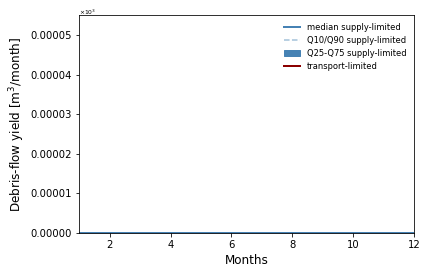

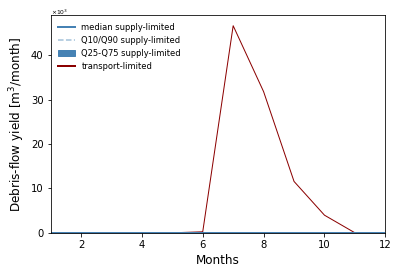

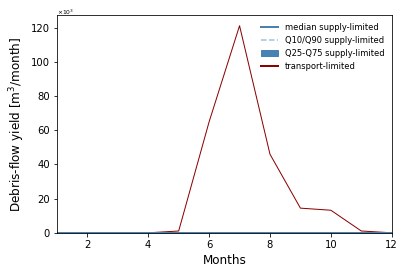

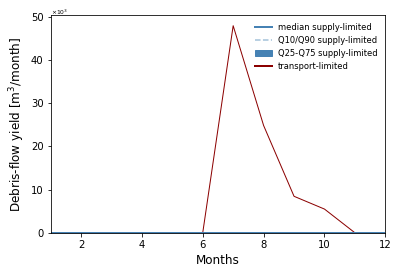

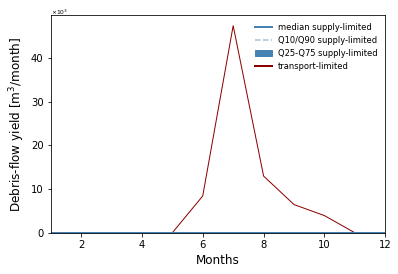

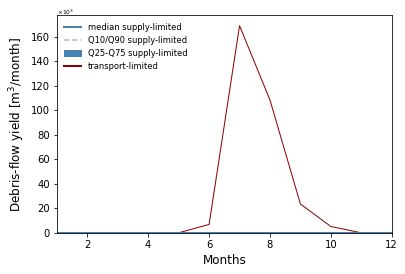

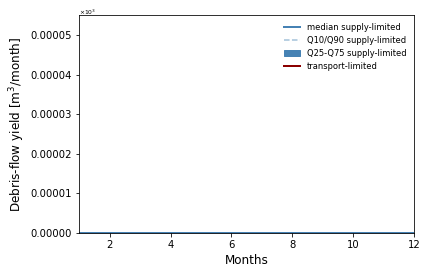

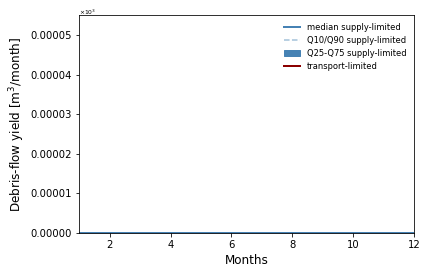

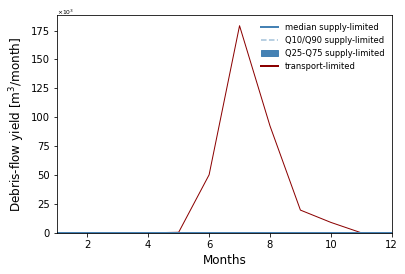

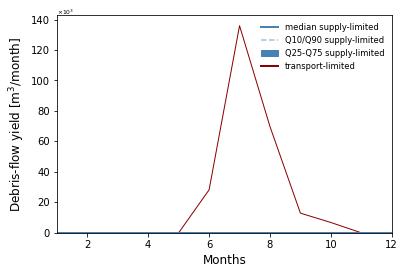

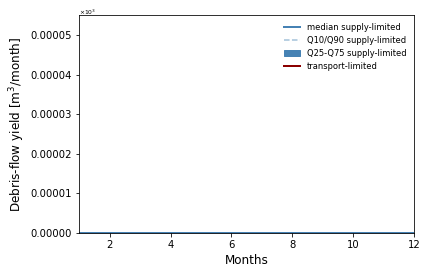

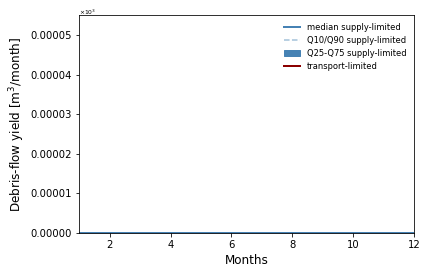

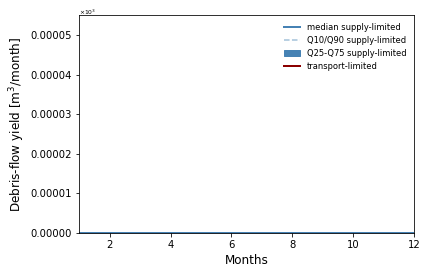

In [2]:

import os
from run import run

climatepath = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang'

# get all folders togetehr 
# ls_ = os.listdir('./langtang')
ls_ = os.listdir(climatepath)
ls = [d for d in ls_ if not d.startswith('.')]
dir0 = os.getcwd()

# run the model for each
for d in ls:
    path = os.path.join(dir0, 'langtang', d)
    print(path)
    os.chdir(path)
    run()
    os.chdir(dir0)


# how much sediment is exported per year in the transport limited case (= unlimited amount of sedoments) ?

In [ ]:
# for each output sediment folder calculate the total annual 
# go over each folder 
# take Sediment out file 
# calculate annual mean
# save into the table, where the table has: cellnr, mean annual sed yeald

In [3]:

# Define your custom function
def annual_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    annual_mean_Qstl = annual_sum.Qstl.mean()
    return annual_mean_Qstl

def annual_sum_percentile(df, percentile):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    annual_percentile_Qstl = annual_sum.Qstl.quantile(percentile / 100)
    return annual_percentile_Qstl


In [4]:

# Path to the directory containing your folders
directory_path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang'

# an empty table to store results
mean_annual_sum = []
mean_annual_25 = []
mean_annual_50 = []
mean_annual_75 = []

# Iterate over each folder
for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)
    
    # Check if it's a directory and its name starts with 'cellnr'
    if os.path.isdir(folder_path) and folder_name.startswith('cellnr'):
        # Locate the 'sediment.out' file within the folder
        sediment_out_path = os.path.join(folder_path, 'Sediment.out')
        
        # Read the contents of the file into a pandas DataFrame
        df = pd.read_csv(sediment_out_path, delimiter=',')  # Adjust delimiter if needed
        # mean:
        mean_annual_sum_value = annual_sum_mean(df)
        # percentiles:
        mean_annual_25_value = annual_sum_percentile(df, 25)
        mean_annual_50_value = annual_sum_percentile(df, 50)
        mean_annual_75_value = annual_sum_percentile(df, 75)

        
        # Save the DataFrame into the results table
        mean_annual_sum.append((int(folder_name.replace('cellnr', '')), mean_annual_sum_value))
        mean_annual_25.append((int(folder_name.replace('cellnr', '')), mean_annual_25_value))
        mean_annual_50.append((int(folder_name.replace('cellnr', '')), mean_annual_50_value))
        mean_annual_75.append((int(folder_name.replace('cellnr', '')), mean_annual_75_value))

# make table
mean_annual_sum_df = pd.DataFrame(mean_annual_sum, columns=['cellnr', 'annual_mean_Qstl_mm']).set_index('cellnr')
mean_annual_25_df = pd.DataFrame(mean_annual_25, columns=['cellnr', 'annual_25percent_Qstl_mm']).set_index('cellnr')#, inplace=True)
mean_annual_50_df = pd.DataFrame(mean_annual_50, columns=['cellnr', 'annual_50percent_Qstl_mm']).set_index('cellnr')#, inplace=True)
mean_annual_75_df = pd.DataFrame(mean_annual_75, columns=['cellnr', 'annual_75percent_Qstl_mm']).set_index('cellnr')#, inplace=True)

# merge together
merged_df = pd.concat([mean_annual_sum_df, mean_annual_25_df, mean_annual_50_df, mean_annual_75_df], axis=1)


In [5]:
# mean_annual_sum_df['annual_mean_Qstl_m'] = mean_annual_sum_df.annual_mean_Qstl_mm/1000     # [sediments mm to m] 
# mean_annual_sum_df['annual_mean_Qstl_m3'] = mean_annual_sum_df.annual_mean_Qstl_m * 4.83*(10**6)   # [sediments [m] * area [m2]


In [6]:
for column in merged_df.columns:
    # for the columns with _mm in it
    if '_mm' in column:
        # Replace '_mm' with '_m3' and create a new column
        new_column_name = column.replace('_mm', '_m3')
        # convert to m3: 1) [sediments mm to m] 2) [sediments [m] * area [m2]
        merged_df[new_column_name] = (merged_df[column] / 1000) * 4.83 * (10 ** 6)
                

In [7]:
merged_df

,annual_mean_Qstl_mm,annual_25percent_Qstl_mm,annual_50percent_Qstl_mm,annual_75percent_Qstl_mm,annual_mean_Qstl_m3,annual_25percent_Qstl_m3,annual_50percent_Qstl_m3,annual_75percent_Qstl_m3
cellnr,,,,,,,,
29,0.000600,0.000000,0.000000,0.000000,2.898119,0.000000,0.000000,0.000000
20,40.363147,10.657493,29.169358,53.311292,194953.999109,51475.691430,140887.997945,257493.539068
19,96.917112,46.876654,77.123271,115.597934,468109.650762,226414.237571,372505.401251,558338.019852
21,36.600320,10.207798,26.388491,47.609355,176779.546569,49303.665560,127456.411629,229953.183048
28,36.636451,12.874247,30.803177,46.234860,176954.060695,62182.614299,148779.344653,223314.372085
12,104.952380,36.780859,74.311308,126.801460,506919.993963,177651.549488,358923.617395,612451.051832
23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,0.000699,0.000000,0.000000,0.000000,3.373845,0.000000,0.000000,0.000000
13,123.849746,61.704303,102.144786,162.124506,598194.272532,298031.781970,493359.318057,783061.361929


## m3/day

In [8]:
# Iterate over each column in the DataFrame
for column in merged_df.columns:
    if '_m3' in column:
        merged_df[column + '_day'] = merged_df[column] /365


# add coordinates and save the output 

In [9]:
# csv with coordinates and geopotential (z) 
langtang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/Thesisfiles_Varya/climate/elevation/geopotential_langtang.csv').set_index('cellnr')
with_coords = pd.concat([merged_df, langtang_elevation],  axis=1).reset_index()




In [10]:
with_coords

,cellnr,annual_mean_Qstl_mm,annual_25percent_Qstl_mm,annual_50percent_Qstl_mm,annual_75percent_Qstl_mm,annual_mean_Qstl_m3,annual_25percent_Qstl_m3,annual_50percent_Qstl_m3,annual_75percent_Qstl_m3,annual_mean_Qstl_m3_day,annual_25percent_Qstl_m3_day,annual_50percent_Qstl_m3_day,annual_75percent_Qstl_m3_day,Latitude,Longitude,z
0,12,104.952380,36.780859,74.311308,126.801460,506919.993963,177651.549488,358923.617395,612451.051832,1388.821901,486.716574,983.352376,1677.948087,28.100000,85.500000,4006.004075
1,13,123.849746,61.704303,102.144786,162.124506,598194.272532,298031.781970,493359.318057,783061.361929,1638.888418,816.525430,1351.669365,2145.373594,28.100000,85.599998,4116.321887
2,14,98.016411,48.311862,80.061861,122.071879,473419.266020,233346.292170,386698.788924,589607.176162,1297.039085,639.304910,1059.448737,1615.362126,28.100000,85.699997,4106.181252
3,19,96.917112,46.876654,77.123271,115.597934,468109.650762,226414.237571,372505.401251,558338.019852,1282.492194,620.312980,1020.562743,1529.693205,28.200001,85.400002,3513.107780
4,20,40.363147,10.657493,29.169358,53.311292,194953.999109,51475.691430,140887.997945,257493.539068,534.120546,141.029292,385.994515,705.461751,28.200001,85.500000,4432.013155
5,21,36.600320,10.207798,26.388491,47.609355,176779.546569,49303.665560,127456.411629,229953.183048,484.327525,135.078536,349.195648,630.008721,28.200001,85.599998,5007.775847
6,22,0.000699,0.000000,0.000000,0.000000,3.373845,0.000000,0.000000,0.000000,0.009243,0.000000,0.000000,0.000000,28.200001,85.699997,5149.130146
7,23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.200001,85.800003,5078.555427
8,28,36.636451,12.874247,30.803177,46.234860,176954.060695,62182.614299,148779.344653,223314.372085,484.805646,170.363327,407.614643,611.820197,28.299999,85.500000,4167.127490
9,29,0.000600,0.000000,0.000000,0.000000,2.898119,0.000000,0.000000,0.000000,0.007940,0.000000,0.000000,0.000000,28.299999,85.599998,5154.558970


In [11]:
#save alltogether 
output_path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited_glaciers/langtang/'
with_coords.to_csv(output_path + 'langtang_glaciers_tl_percentiles_with_coords.csv', index = False)

In [12]:
with_coords.columns

Index(['cellnr', 'annual_mean_Qstl_mm', 'annual_25percent_Qstl_mm',
       'annual_50percent_Qstl_mm', 'annual_75percent_Qstl_mm',
       'annual_mean_Qstl_m3', 'annual_25percent_Qstl_m3',
       'annual_50percent_Qstl_m3', 'annual_75percent_Qstl_m3',
       'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
       'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
       'Latitude', 'Longitude', 'z'],
      dtype='object')

In [13]:
columns_to_copy = ['cellnr', 'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
                   'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
                   'Latitude', 'Longitude']

selected_columns= with_coords[columns_to_copy].copy()
                              

In [14]:

selected_columns.to_csv(output_path + 'langtang__glaciers_tl_percentiles_with_coords_m3_day.csv', index = False)

# test for 1 file

In [ ]:
testsed = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/cellnr28/Sediment.out')
testsed

df = annual_sum_percentile(testsed, 25)





In [ ]:

df = testsed

df['D'] = pd.to_datetime(df['D'])
df['Year'] = df['D'].dt.year
annual_sum = df.groupby('Year').sum()


In [ ]:
plt.figure(figsize=(20,7))
plt.bar(height = annual_sum.Qstl, x = annual_sum.index, label = 'Qstl')
plt.bar(height = annual_sum.Qdftl, x = annual_sum.index, color = 'lime', alpha = 0.5, label = 'Qdstl')

# plt.bar(height = annual_sum.Q100, x = annual_sum.index, color = 'magenta', alpha = 0.5, label = 'Q100')
plt.legend()

In [ ]:
plt.figure(figsize=(20,7))
# plt.bar(height = annual_sum.Qstl, x = annual_sum.index, label = 'Qstl')
# plt.bar(height = annual_sum.Qdftl, x = annual_sum.index, color = 'lime', alpha = 0.5, label = 'Qdstl')

plt.bar(height = annual_sum.Q100, x = annual_sum.index, color = 'magenta', alpha = 0.5, label = 'Q100')
plt.legend()

In [ ]:
annual_sum.describe()

In [ ]:
# test climate input
import pandas as pd
testclimate = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/cellnr12/climatecell.12.met')

In [ ]:
testsed = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/cellnr28/Sediment.out')
testsed

df = testsed


df['D'] = pd.to_datetime(df['D'])
df['Year'] = df['D'].dt.year
annual_sum = df.groupby('Year').sum()
annual_mean_Qstl = annual_sum.Qstl.mean()

In [ ]:
annual_sum.Qstl.mean()

## 